# Take a look at the fractions

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.ascii as at

In [13]:
from file_loc import FileLocs

fl = FileLocs()
file_base = fl.data_loc+'tmp/{type}_{prop}.npy'

In [14]:
label1 = ['Cluster', 'Infall', 'Interlopers']
label2 = ['Cluster+Infall', 'Cluster+Interlopers', 'Infall+Interlopers']


In [15]:
labels_mpr = ['sf', 'spiral', 's0', 'bulge', 'disk', 'bar', 'merger']
labels_bpt = ['lsf', 'liners', 'agn', 'compos', 'unclas']

labels = labels_mpr+labels_bpt

In [16]:
columnsA = ['fo_%s'%li for li in labels]

In [186]:
cat0 = at.read('../data/groupCatalog_Yang_deCarvalho2017_frac.csv')

In [187]:
cat

Yang,z,N200,logM200,smasso,smasso_err,smassi,smassi_err,sfro,sfro_err,sfri,sfri_err,smasso_quenching,smasso_quenching_err,smassi_quenching,smassi_quenching_err,sfro_quenching,sfro_quenching_err,sfri_quenching,sfri_quenching_err,smasso_sf,smasso_sf_err,smassi_sf,smassi_sf_err,sfro_sf,sfro_sf_err,sfri_sf,sfri_sf_err,smasso_elliptical,smasso_elliptical_err,smassi_elliptical,smassi_elliptical_err,sfro_elliptical,sfro_elliptical_err,sfri_elliptical,sfri_elliptical_err,smasso_spiral,smasso_spiral_err,smassi_spiral,smassi_spiral_err,sfro_spiral,sfro_spiral_err,sfri_spiral,sfri_spiral_err
int64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
2,0.036,525,15.29,13.156141387596426,3.707776428679562e-05,13.472954148473825,1.2908385927722587e-05,2.34537828344772,0.00016158164531330908,2.801542028266027,0.0001038319850937863,13.010415830450558,6.801688633673456e-05,13.1735577779145,3.296502847607311e-05,2.213229040020456,0.0002822262691459362,2.53901296735952,0.00032791620284245934,12.611065512038305,0.00018287612570797783,13.17028435951569,3.9898819545434395e-05,1.7642581996796796,0.000924505469778145,2.458262953498491,0.00022719433291955098,12.948334627512445,9.10778311434613e-05,13.107893015568191,4.267396332456105e-05,2.131247131043079,0.0004040442141928138,2.490000864431976,0.00041442801883740326,12.736248575824874,0.0001135283486682264,13.227716442536206,3.1604901885159244e-05,1.935598475733421,0.00047869027048023325,2.5107748006050397,0.0001828655029048848
4,0.03,217,14.66,12.729380311965805,0.00013322511668779468,13.138975190386105,3.2368717493604866e-05,2.053028026804878,0.0005487600124847932,2.4951127693629265,0.0005262226867576742,12.491781311521214,0.0003549955806964921,12.840720198975529,0.0001026967236361142,1.7662602558450022,0.001676985422670327,2.1026072756588245,0.00038013768581003746,12.3540438514292,0.0004029020655547332,12.835152344981916,8.188946459698048e-05,1.7372514850676994,0.0013944394301476787,2.269602857999656,0.0016231243851098445,12.492754899974981,0.0003764849808286149,12.791557743650149,0.0001083375142264888,1.7310514658985234,0.0018795614272281995,2.002276214897048,0.00042276063556960687,12.35270334209537,0.0003724069759691478,12.879852623309915,7.869436748492556e-05,1.7719806323232445,0.0012398757196145924,2.326670928333299,0.0013705746224322414
5,0.03,277,14.81,12.875859027619686,7.90750650438589e-05,13.1801955128918,2.713530660154037e-05,2.320783181761182,0.00039097488441664435,2.5652246717542684,9.944678123526499e-05,12.711478851062557,0.000160056024525139,12.821359433068203,7.812323900945811e-05,2.190246957765119,0.0007748789093599459,2.284549431979137,0.0002585108749432737,12.37432339057223,0.0003090438166585689,12.930173424692997,7.307417489004616e-05,1.7350953824002084,0.0012665343351941885,2.242838809280756,0.00030214163440553756,12.687146232006022,0.00018413065181998003,12.799584565357595,9.4168712416369e-05,2.1510134670476626,0.0008708070921498904,2.242475266149574,0.00027046537820026685,12.422931009256418,0.0002469722530945145,12.946397585957397,6.367601339931904e-05,1.8307359086432944,0.001334578127559741,2.284879420290822,0.00027418845352393024
6,0.033,167,14.6,12.568686270339024,0.0002277545743656601,12.699762206799393,0.00013585430642279727,1.8464032776559027,0.0007257606172594417,1.920848888146226,0.0004740057025556988,12.316017243330474,0.0004467990806938174,12.356562832888857,0.0005700337580226633,1.5641701856096708,0.0015000569981117131,1.5924685433572092,0.0015495784771602543,12.213227302375095,0.0009710534607161871,12.437166956877219,0.00026631311696113024,1.5257258707692916,0.0028898606837785023,1.6455483842520462,0.0011762557557094418,12.10909173937293,0.0005775399899997415,12.221308098615074,0.

In [10]:
cat[['Yang','z','N200']]

Yang,z,N200
int64,float64,int64
2,0.036,525
4,0.03,217
5,0.03,277
6,0.033,167
7,0.042,106
8,0.09,183
9,0.038,143
10,0.045,106
11,0.056,156


In [185]:
df = cat.to_pandas()

In [186]:
def get_columns(mytpe):
    columnsA = ['f%s_%s'%(li,mytpe) for li in ('o','i','n')]
    columnsA += ['qf1_%s'%(mytpe),'qf2_%s'%(mytpe),'qf3_%s'%(mytpe)]
    return columnsA

In [187]:
mytpe = 'elliptical'
df[get_columns(mytpe)].describe(percentiles=[.16,.50,.84])

,fo_elliptical,fi_elliptical,fn_elliptical,qf1_elliptical,qf2_elliptical,qf3_elliptical
count,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000
mean,0.662220,0.528752,0.459022,0.281264,0.362700,0.119874
std,0.146742,0.139395,0.138317,0.235697,0.259710,0.182194
min,0.019231,0.118734,0.026667,-0.603743,-0.812633,-0.478011
16%,0.517651,0.397115,0.312000,0.069371,0.117840,-0.037171
50%,0.686930,0.537429,0.464506,0.296513,0.397796,0.115992
84%,0.807771,0.671338,0.594154,0.505175,0.621529,0.292807
max,0.976073,0.872668,0.853299,0.873631,0.927970,0.769228


In [188]:
mytpe = 'quenching'
df[get_columns(mytpe)].describe(percentiles=[.16,.50,.84])

,fo_quenching,fi_quenching,fn_quenching,qf1_quenching,qf2_quenching,qf3_quenching
count,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000
mean,0.733907,0.590864,0.496330,0.361608,0.464167,0.175389
std,0.143508,0.144218,0.148734,0.256710,0.271534,0.223036
min,0.309059,0.181562,0.118867,-0.534216,-0.776623,-0.796605
16%,0.583977,0.441385,0.340025,0.136407,0.194951,-0.009616
50%,0.759504,0.597406,0.500615,0.371297,0.490488,0.170693
84%,0.867989,0.748923,0.652129,0.596349,0.723796,0.371459
max,1.000000,0.949878,0.852747,1.000000,1.000000,0.851840


In [190]:
mytpe = 'spiral'
df[get_columns(mytpe)].describe(percentiles=[.16,.50,.84])

,fo_spiral,fi_spiral,fn_spiral,qf1_spiral,qf2_spiral,qf3_spiral
count,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000
mean,0.337780,0.471248,0.540978,-0.296646,-0.624742,-0.236215
std,0.146742,0.139395,0.138317,0.308394,1.471908,0.844414
min,0.023927,0.127332,0.146701,-2.032724,-24.759878,-14.415020
16%,0.192229,0.328662,0.405846,-0.547210,-0.977868,-0.434980
50%,0.313070,0.462571,0.535494,-0.238820,-0.449044,-0.147081
84%,0.482349,0.602885,0.688000,-0.049111,-0.100328,0.035066
max,0.980769,0.881266,0.973333,0.888434,0.844164,0.541426


In [189]:
mytpe = 'spiral'
columnsA = ['f%s_%s'%(li,mytpe) for li in ('o','i','n')]
df[columnsA].describe(percentiles=[.16,.50,.84])

,fo_spiral,fi_spiral,fn_spiral
count,319.000000,319.000000,319.000000
mean,0.337780,0.471248,0.540978
std,0.146742,0.139395,0.138317
min,0.023927,0.127332,0.146701
16%,0.192229,0.328662,0.405846
50%,0.313070,0.462571,0.535494
84%,0.482349,0.602885,0.688000
max,0.980769,0.881266,0.973333


In [175]:
import pandas as pd

def plot_enviroment(cat,mytpe):
    orbital = np.array(cat['fo_%s'%(mytpe)])
    infall = np.array(cat['fi_%s'%(mytpe)])
    interloper = np.array(cat['fn_%s'%(mytpe)])
    
    x1label = np.full((orbital.size),'cluster')
    x2label = np.full((orbital.size),'infall')
    x3label = np.full((orbital.size),'interloper')
    
    y = np.hstack([orbital,infall,interloper])
    x = np.hstack([x1label,x2label,x3label])
    
    res = pd.DataFrame({'fraction':y,mytpe:x})
    
    plt.clf()
#     g = sns.catplot(x="category", y="fraction", kind="violin", inner=None, data=res)
    g = sns.catplot(x=mytpe, y="fraction", kind="box", data=res,ci=86.5,estimator=np.median)
    #sns.swarmplot(x="category", y="fraction", color="k", size=3, data=res, ax=g.ax)
    
    return res

<Figure size 432x288 with 0 Axes>

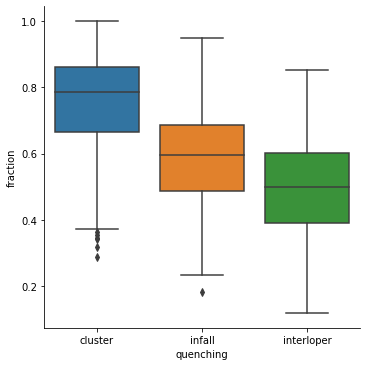

In [176]:
df = plot_enviroment(cat,'quenching')

<Figure size 432x288 with 0 Axes>

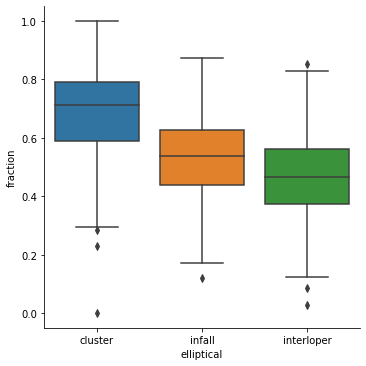

In [177]:
df = plot_enviroment(cat,'elliptical')

<Figure size 432x288 with 0 Axes>

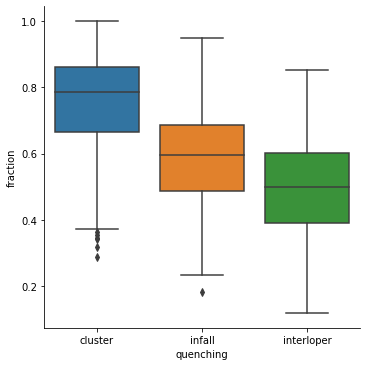

In [178]:
df = plot_enviroment(cat,'quenching')

<Figure size 432x288 with 0 Axes>

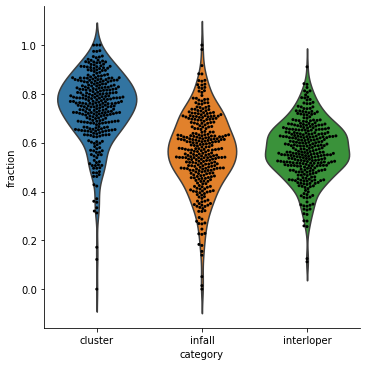

In [81]:
df = plot_enviroment(cat,'elliptical')

<AxesSubplot:xlabel='category', ylabel='fraction'>

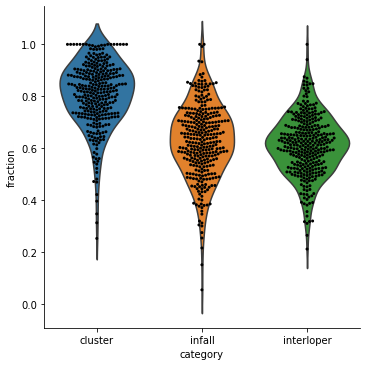

In [30]:
mytype='quenching'

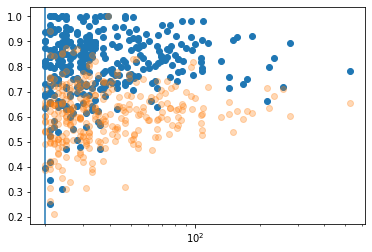

In [31]:
plt.scatter(cat['N200'],cat['fo_%s'%(mytype)])
plt.scatter(cat['N200'],cat['fn_%s'%(mytype)],alpha=0.3)
plt.axvline(20)
plt.xscale('log')

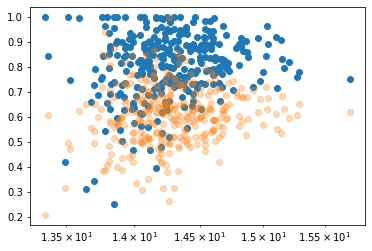

In [32]:
plt.scatter(cat['logM200'],cat['fo_%s'%(mytype)])
plt.scatter(cat['logM200'],cat['fn_%s'%(mytype)],alpha=0.3)
plt.xscale('log')

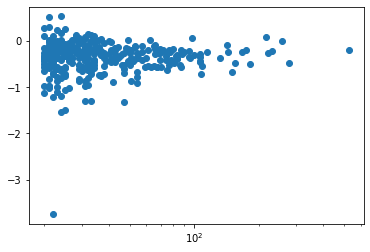

In [344]:
plt.scatter(cat['N200'],cat['qf2_%s'%(mytype)])
plt.xscale('log')

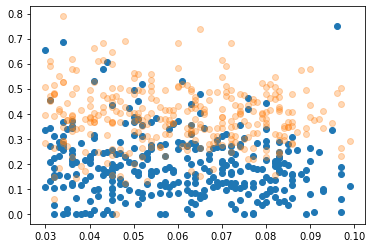

In [345]:
plt.scatter(cat['z'],cat['fo_%s'%(mytype)])
plt.scatter(cat['z'],cat['fn_%s'%(mytype)],alpha=0.3)
# plt.xscale('log')

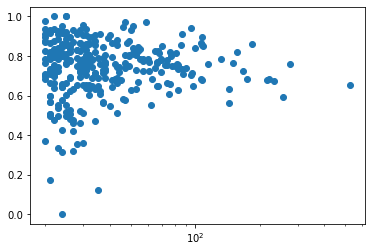

In [333]:
plt.scatter(cat['N200'],cat['fo_elliptical'])
plt.xscale('log')

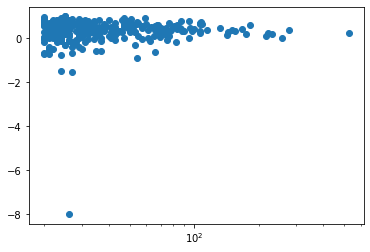

In [334]:
plt.scatter(cat['N200'],cat['qf1_elliptical'])
plt.xscale('log')

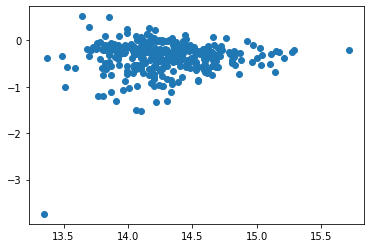

In [335]:
plt.scatter(cat['logM200'],cat['qf2_sf'])

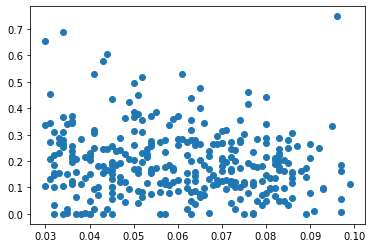

In [336]:
plt.scatter(cat['z'],cat['fo_sf'])

In [337]:
labels_mpr = ['quenching', 'sf', 'elliptical', 'spiral', 's0', 'bulge', 'disk', 'bar', 'merger']
labels_bpt = ['lsf', 'liners', 'agn', 'compos', 'unclas']

In [338]:
mytype1='quenching'
mytype2='unclas'

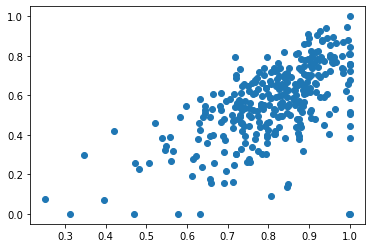

In [339]:
plt.scatter(cat['fo_%s'%(mytype1)],cat['fo_%s'%(mytype2)])
# plt.scatter(cat['N200'],cat['fn_%s'%(mytype)],alpha=0.3)
# plt.xscale('log')

In [340]:
mytype1='elliptical'
mytype2='quenching'
mytype3='unclas'

(-0.02, 1.02)

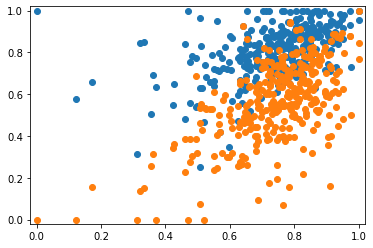

In [341]:
plt.scatter(cat['fo_%s'%(mytype1)],cat['fo_%s'%(mytype2)])
plt.scatter(cat['fo_%s'%(mytype1)],cat['fo_%s'%(mytype3)])
plt.xlim(-0.02,1.02)
plt.ylim(-0.02,1.02)
# plt.scatter(cat['N200'],cat['fn_%s'%(mytype)],alpha=0.3)
# plt.xscale('log')

In [11]:
cat = at.read('../data/groupCatalog_Yang_deCarvalho2017_smass.csv')

In [21]:
halo_mass = cat['logM200']
n200 = cat['N200']

In [153]:
smasso = cat['smasso']
smassi = cat['smassi']
sfro = cat['sfro']
sfri = cat['sfri']

ssfro = sfro-smasso
ssfri = sfri-smassi

In [154]:
fstellar = smasso-halo_mass

In [155]:
OIstelar = smasso-smassi

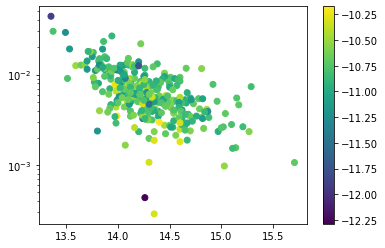

In [156]:
plt.scatter(halo_mass,10**fstellar,c=ssfro)
plt.yscale('log')
plt.colorbar()

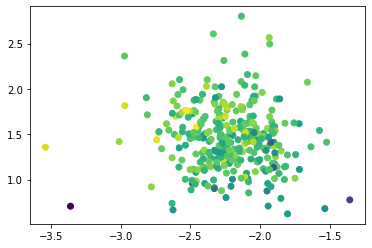

In [157]:
# plt.plot([11.,13.5],[11.,13.5],'k--')
plt.scatter(fstellar,sfri,c=ssfro)

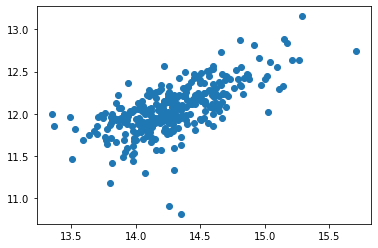

In [158]:
plt.scatter(halo_mass,smasso)

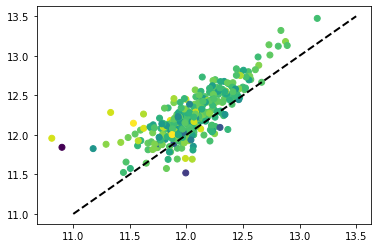

In [159]:
plt.plot([11.,13.5],[11.,13.5],'k--',lw=2)
plt.scatter(smasso,smassi,c=ssfro)

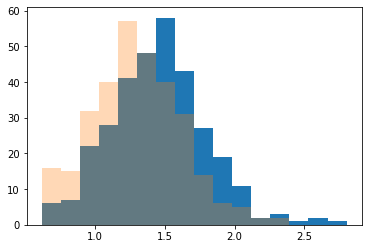

In [176]:
a = plt.hist(sfri,bins=16)
a = plt.hist(sfro,bins=a[1],alpha=0.3)

In [178]:
a[1]

array([0.62052656, 0.75684003, 0.89315349, 1.02946696, 1.16578043,
       1.30209389, 1.43840736, 1.57472083, 1.71103429, 1.84734776,
       1.98366123, 2.11997469, 2.25628816, 2.39260163, 2.52891509,
       2.66522856, 2.80154203])

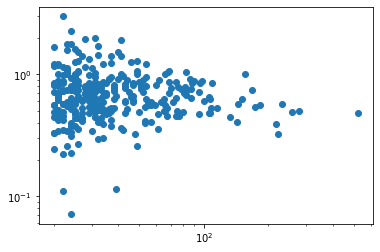

In [161]:
plt.scatter(n200,10**OIstelar)
plt.yscale('log')
plt.xscale('log')

In [162]:

from utils import gaussian_kde

In [163]:
stellar_mass_label = r'Log($M_{\star}/M_{\odot}$) ' 
sfr_label = r'SFR [$ M_{\star} / yr$]'
ssfr_label= r'sSFR [yr$^{-1}$]'

In [173]:
def get_kde(xy,weights=None):
    pdf = gaussian_kde(xy, weights=weights)
    pdf.set_bandwidth(bw_method=pdf.factor / 1.2)  # kde bandwidth
    zz2 = pdf((np.ravel(xx), np.ravel(yy)))
    zz2 = np.reshape(zz2, xx.shape)
    return zz2

In [179]:
# grid
xmin, xmax = 11., 13.0
# ymin, ymax = -10.0, -11.75
ymin, ymax = 0.4, 2.5
x = np.linspace(xmin, xmax, 100)  # kde resolution
y = np.linspace(ymin, ymax, 100)  # kde resolution
xx, yy = np.meshgrid(x, y)

def sSFRmass(x1,x2,x3,xth=0.0,ax=None,title=None,ylabel=ssfr_label):
    f = get_kde(np.vstack([x1,x2]),weights=x3)
    
    ax.set_xlim(xmin, xmax)
    ax.set_ylim(ymin, ymax)

#     cfset = ax.contourf(xx, yy, f, cmap='jet')
    ax.imshow(np.rot90(f.T), cmap='jet', extent=[xmin, xmax, ymin, ymax], aspect=0.5)
    cset = ax.contour(xx, yy, f, colors='k')
    ax.clabel(cset, inline=1, fontsize=10)
    ax.set_xlabel(stellar_mass_label,fontsize=16)
    ax.set_ylabel(ylabel,fontsize=16)
    ax.axhline(-11.0,ls='--',lw=3,color='white')
    if title is not None:
        ax.set_title(title,fontsize=22)

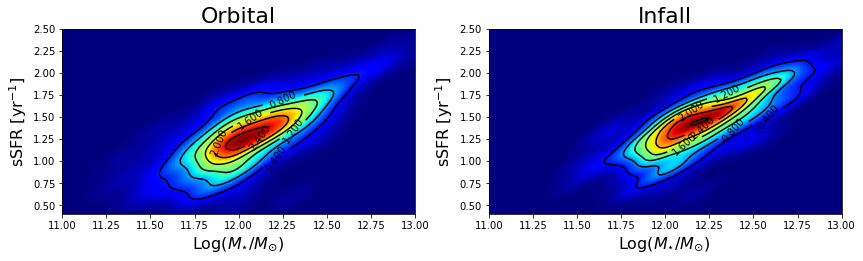

In [180]:
fig, axis = plt.subplots(1, 2, figsize=(12,6))
sSFRmass(smasso,sfro,np.ones_like(smasso),ax=axis[0],title='Orbital')
sSFRmass(smassi,sfri,np.ones_like(smasso),ax=axis[1],title='Infall')
fig.subplots_adjust(wspace=0.2,hspace=0.05)
fig.tight_layout()
# fig.savefig('../plots/ssfr_mass_dynamical_classes.png',facecolor='w', transparent=False,dpi=150)

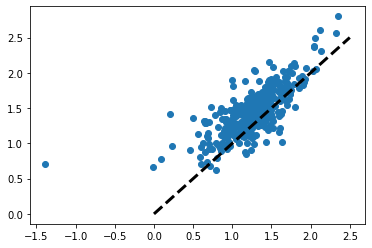

In [183]:
plt.scatter(sfro,sfri)
plt.plot([0.,2.5],[0.,2.5],'k--',lw=3)

In [224]:
# fq = np.array(cat0['fo_spiral'])
fq = np.array(cat['smasso_sf'])

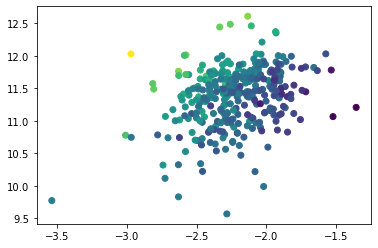

In [225]:
plt.scatter(fstellar,fq,c=halo_mass)
# plt.ylim(11)